# Random Forest

## Import libraries

In [1]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [2]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import violinplot
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier #Importamos el modelo
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV


In [3]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir
from src.utils.metrics import display_and_plot_all_metrics

## Set up

In [4]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [5]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_final.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_final.csv


In [6]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [7]:
df_wines.sample(10)

,PC1,PC2,PC5,PC6,PC7,quality_low,style
2828,0.396207,0.261609,-0.101251,0.099923,-0.376050,0,1
3050,0.242580,0.276980,-0.058802,-0.004108,0.285388,1,1
4374,-0.516616,-0.280823,-0.434202,0.141833,0.333576,0,1
4958,0.125568,-0.599328,-0.064026,0.235867,0.327467,0,1
4218,-0.097370,-0.276649,0.160607,0.067533,0.139379,0,1
3747,-0.385028,-0.421772,-0.569108,0.169815,0.063737,0,1
4327,0.441249,-0.092070,-0.031021,0.155991,0.097488,0,1
4197,-0.319111,-0.381044,-0.081504,0.059975,0.105240,0,1
1016,-0.184112,-0.134177,0.107324,-0.222260,-0.133637,0,1
2282,0.111104,-0.029169,0.311375,-0.019261,0.065859,0,1


# Preparamos los datos

In [8]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_low"])
y = df_wines.quality_low #Defino el Target

In [9]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [10]:
X_train.shape, X_test.shape

((3509, 6), (1504, 6))

# Random Forest

In [11]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")


In [12]:
#Entrenamos el modelo
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [13]:
y_test_pred = model.predict(X_test) #Prediccion en Test

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.84,0.79,0.71,0.65,0.59


### Grafico de confusion matrix: 

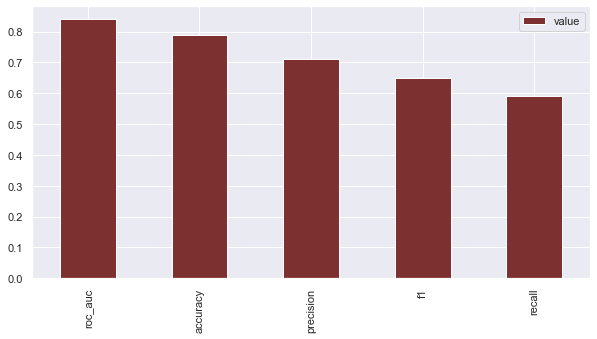

<Figure size 720x720 with 0 Axes>

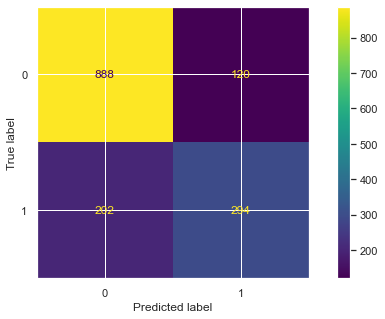

### Grafico de roc: 

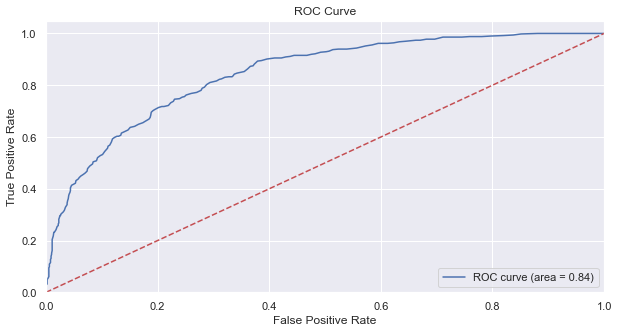

In [14]:
display_and_plot_all_metrics(model, X_test, y_test, y_test_pred)

A simple vista podemos ver que el Random Forest nos da mejores resultados que el Decision Tree y el KNN. Veamos si lo podemos mejorar.

# Hypertuning de Parámetros

In [15]:
# Hyperparametros

hyperparameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [17]:
# creamos el modelo
model_2 = RandomForestClassifier()

In [18]:
# creamos el modelo
clf =GridSearchCV(model_2,param_grid=hyperparameters,scoring="accuracy")


In [19]:
#Entrenamos el modelo 
best_model = clf.fit(X_train, y_train)

In [20]:
y_test_pred = clf.predict(X_test)


In [21]:
# Mostramos los mejores parametros
best_model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
best_model.best_estimator_

RandomForestClassifier(max_depth=100, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=200)

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.83,0.78,0.7,0.64,0.58


### Grafico de confusion matrix: 

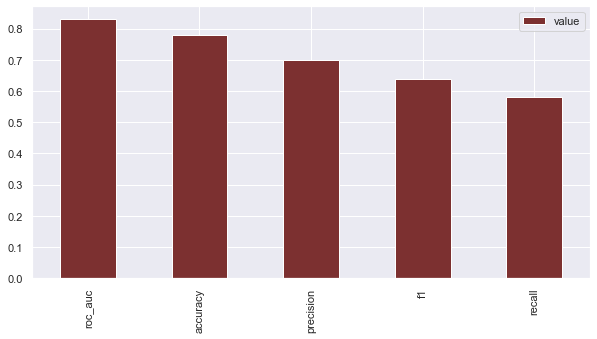

<Figure size 720x720 with 0 Axes>

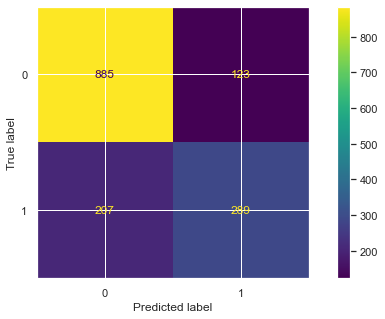

### Grafico de roc: 

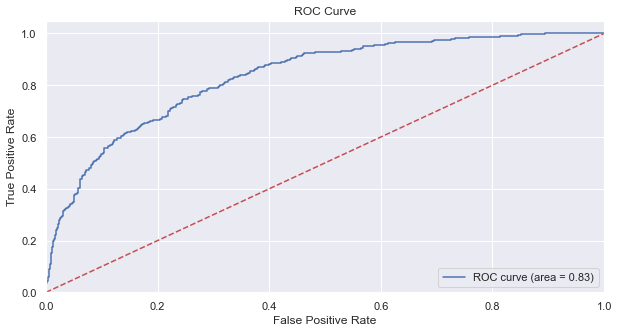

In [23]:
display_and_plot_all_metrics(clf,X_test,y_test,y_test_pred)